In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
for dirname, _, filenames in os.walk('/Machine algoritms with python/introduction to deep learning'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Machine algoritms with python/introduction to deep learning\2d-datasets-classification.zip
/Machine algoritms with python/introduction to deep learning\target.npy
/Machine algoritms with python/introduction to deep learning\train.npy
/Machine algoritms with python/introduction to deep learning\Untitled.ipynb
/Machine algoritms with python/introduction to deep learning\.ipynb_checkpoints\Untitled-checkpoint.ipynb
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_1.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_2.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_3.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_4.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_5.csv
/Machine algoritms with python/introduction to deep learning\datasets\2d_dataset_6.csv
/Machine algoritms with python/introduction to deep learning\

In [3]:
with open('train.npy', 'rb') as fin:
    X = np.load(fin)
with open('target.npy', 'rb') as fin:
    y = np.load(fin)
    


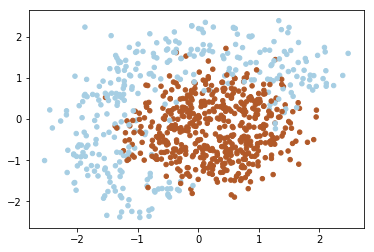

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()

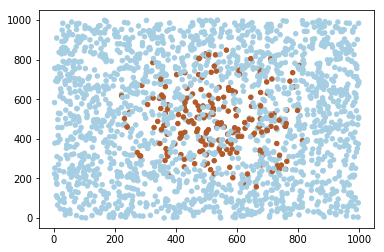

In [5]:
file = "datasets\\2d_dataset_6.csv"
df = pd.read_csv(file)
plt.scatter(df.alpha, df.beta, c=df.y, cmap=plt.cm.Paired, s=20)
plt.show()

In [7]:
print(X.shape)
print(y.shape)

(826, 2)
(826,)


In [14]:
def expand(X):
    """
    Adds quadratic features. 
    This expansion allows your linear model to make non-linear separation.
    
    For each sample (row in matrix), compute an expanded row:
    [feature0, feature1, feature0^2, feature1^2, feature1*feature2, 1]
    
    :param X: matrix of features, shape [n_samples,2]
    :returns: expanded features of shape [n_samples,6]
    """
    X_expanded = np.zeros((X.shape[0], 6))
    
    # TODO:<your code here>
    X_expanded[:,0], X_expanded[:,1] = X[:,0],X[:,1]
    X_expanded[:,2], X_expanded[:,3]= X[:,0]**2, X[:,1]**2
    X_expanded[:,4], X_expanded[:,5] = X[:,0]*X[:,1], np.ones(X.shape[0])
    
    return X_expanded

In [15]:
X_expanded = expand(X)

In [16]:
X_expanded

array([[ 1.20798057,  0.0844994 ,  1.45921706,  0.00714015,  0.10207364,
         1.        ],
       [ 0.76121787,  0.72510869,  0.57945265,  0.52578261,  0.5519657 ,
         1.        ],
       [ 0.55256189,  0.51937292,  0.30532464,  0.26974823,  0.28698568,
         1.        ],
       ...,
       [-1.22224754,  0.45743421,  1.49388906,  0.20924606, -0.55909785,
         1.        ],
       [ 0.43973452, -1.47275142,  0.19336645,  2.16899674, -0.64761963,
         1.        ],
       [ 1.4928118 ,  1.15683375,  2.22848708,  1.33826433,  1.72693508,
         1.        ]])

In [17]:

dummy_X = np.array([
        [0,0],
        [1,0],
        [2.61,-1.28],
        [-0.59,2.1]
    ])

# call your expand function
dummy_expanded = expand(dummy_X)

# what it should have returned:   x0       x1       x0^2     x1^2     x0*x1    1
dummy_expanded_ans = np.array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
                               [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
                               [ 2.61  , -1.28  ,  6.8121,  1.6384, -3.3408,  1.    ],
                               [-0.59  ,  2.1   ,  0.3481,  4.41  , -1.239 ,  1.    ]])

#tests
assert isinstance(dummy_expanded,np.ndarray), "please make sure you return numpy array"
assert dummy_expanded.shape == dummy_expanded_ans.shape, "please make sure your shape is correct"
assert np.allclose(dummy_expanded,dummy_expanded_ans,1e-3), "Something's out of order with features"

print("Seems legit!")

Seems legit!
